In [3]:
%pylab notebook
from scipy.integrate import fixed_quad
from scipy.integrate import quad
import sympy as sp
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [12]:
xmin=20. ; xmax=3000.
nu=linspace(xmin,xmax,1000)

In [13]:
sym_x=sp.symbols("sym_x")

num_vec=30
sym_vec={}
for i in range(num_vec):
    sym_vec[i]=sym_x**i*sp.exp(-0.2*sym_x**2.)

In [17]:
# Unnormalized gram-schmidt
def dot_prod(v1,v2,xmin,xmax):
    return quad(lambda x: v1(x)*v2(x),xmin,xmax)[0]

sym_basis={}
def get_gs_basis(sym_vec,xmin,xmax):
    cnt=0
    for i in range(len(sym_vec)):    
        #print "i=",i
        vi=sp.lambdify(sym_x,sym_vec[i],modules="numpy")
        bdotv=[]
        for j in range(len(sym_basis)):
            bj=sp.lambdify(sym_x,sym_basis[j],modules="numpy")
            numerator=dot_prod(vi,bj,xmin,xmax)
            denominator=dot_prod(bj,bj,xmin,xmax)
            bdotv=append(bdotv,numerator/denominator)
        sym_basis[i]=sym_vec[i]-sum(bdotv[j]*sym_basis[j] for j in range(len(bdotv)))
        print i#sym_basis[i]

get_gs_basis(sym_vec,xmin,xmax)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [11]:
# Normalized gram-schmidt
def dot_prod(v1,v2,xmin,xmax):
    return quad(lambda x: v1(x)*v2(x),xmin,xmax)[0]


def get_gs_basis(sym_vec,xmin,xmax):
    sym_basis={}
    cnt=0
    for i in range(len(sym_vec)):    
        #print "i=",i
        vi=sp.lambdify(sym_x,sym_vec[i],modules="numpy")
        bdotv=[]
        for j in range(len(sym_basis)):
            bj=sp.lambdify(sym_x,sym_basis[j],modules="numpy")
            bdotv=append(bdotv,dot_prod(vi,bj,xmin,xmax))
        temp_sym_fn=sym_vec[i]-sum(bdotv[j]*sym_basis[j] for j in range(len(bdotv)))
        fn=sp.lambdify(sym_x,temp_sym_fn,modules="numpy")
        norm=dot_prod(fn,fn,xmin,xmax) ; print norm
        sym_basis[i]=(sym_vec[i]-sum(bdotv[j]*sym_basis[j] for j in range(len(bdotv))))/sqrt(norm)
        print i,len(sym_vec)#,sym_basis[i]
    return sym_basis

sym_basis=get_gs_basis(sym_vec,xmin,xmax)
print 
sym_basis=get_gs_basis(sym_basis,xmin,xmax)
sym_basis=get_gs_basis(sym_basis,xmin,xmax)

0.519982917593
0 30
0.137586359706
1 30
0.0798288937097
2 30
0.0687330820129
3 30
0.0692586157787
4 30
0.071487707237
5 30
0.0729919508554
6 30
0.0738569465672
7 30
0.0745431616189
8 30
20.4311937258
9 30
2537.14266957
10 30
1957861.63007
11 30
410236484.607
12 30
48876175737.0
13 30
4.13928279276e+12
14 30
2.77735633079e+14
15 30
1.57293371957e+16
16 30
7.83244976115e+17
17 30
3.52688140593e+19
18 30
1.46541993215e+21
19 30
5.70337625413e+22
20 30
2.10316672361e+24
21 30
7.41410183707e+25
22 30
2.5162379662e+27
23 30
8.268271132e+28
24 30
2.6427037914e+30
25 30
8.24701690511e+31
26 30
2.52071064784e+33
27 30
7.5660032539e+34
28 30
2.23505136908e+36
29 30

1.0
0 30
1.0
1 30
1.0
2 30
1.0
3 30
1.0
4 30
1.0
5 30
0.999999999999
6 30
0.999999974715
7 30
0.998028928689
8 30
0.00365957785657
9 30
2.95794246103e-05
10 30
3.84417119479e-08
11 30
1.84085015003e-10
12 30
1.82771659358e-09
13 30
9.50660243726e-10
14 30
2.55316615371e-08
15 30
2.53928285796e-07
16 30
1.31451744041e-06
17 30
4.72294

<IPython.core.display.Javascript object>


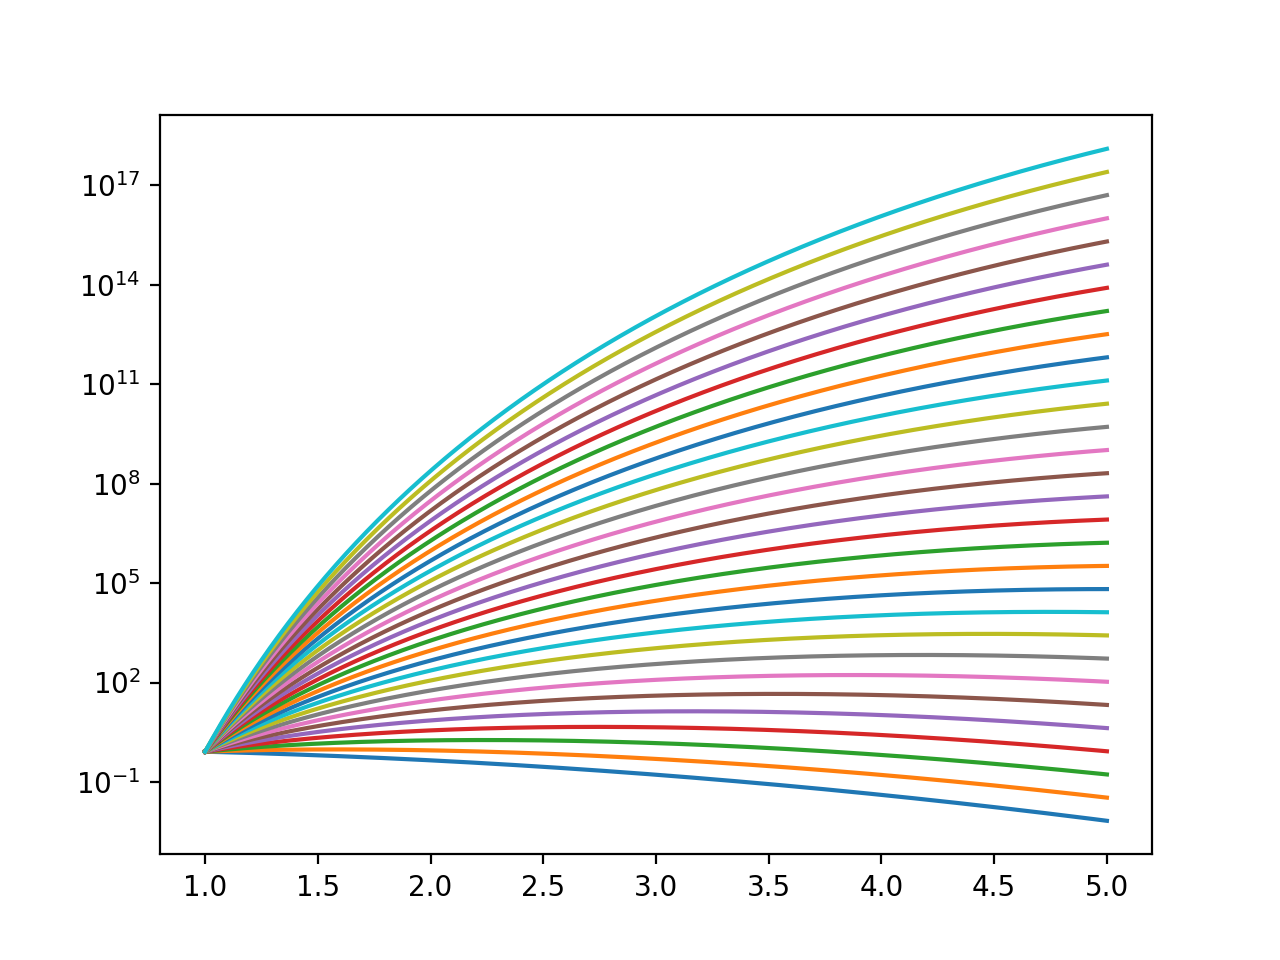

30


[]

In [11]:
figure()
print len(sym_vec)
for i in range(len(sym_vec)):
    fn=sp.lambdify(sym_x,sym_vec[i],modules="numpy")
    plot(nu,fn(nu))
    
semilogy()

<IPython.core.display.Javascript object>


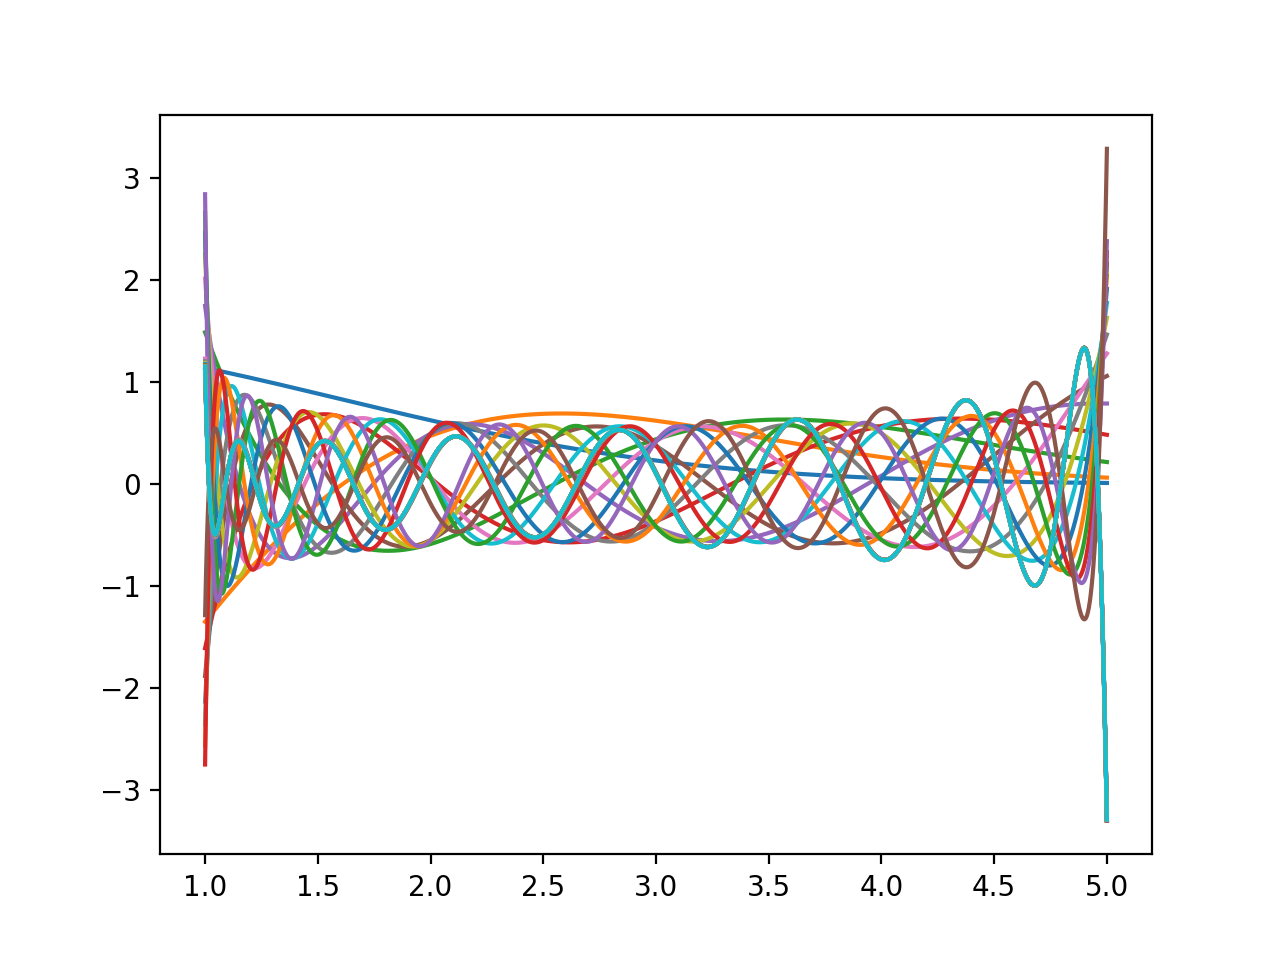

In [12]:
figure()
for i in range(len(sym_basis)):
    fn=sp.lambdify(sym_x,sym_basis[i],modules="numpy")
    plot(nu,fn(nu))

In [14]:
cov=zeros((len(sym_basis),len(sym_basis)),float)

for i in xrange(len(sym_basis)):
    for j in xrange(i+1):
        bi=sp.lambdify(sym_x,sym_basis[i],modules="numpy")
        bj=sp.lambdify(sym_x,sym_basis[j],modules="numpy")
        cov[i,j]=dot_prod(bi,bj,xmin,xmax)
        cov[j,i]=cov[i,j]

<IPython.core.display.Javascript object>


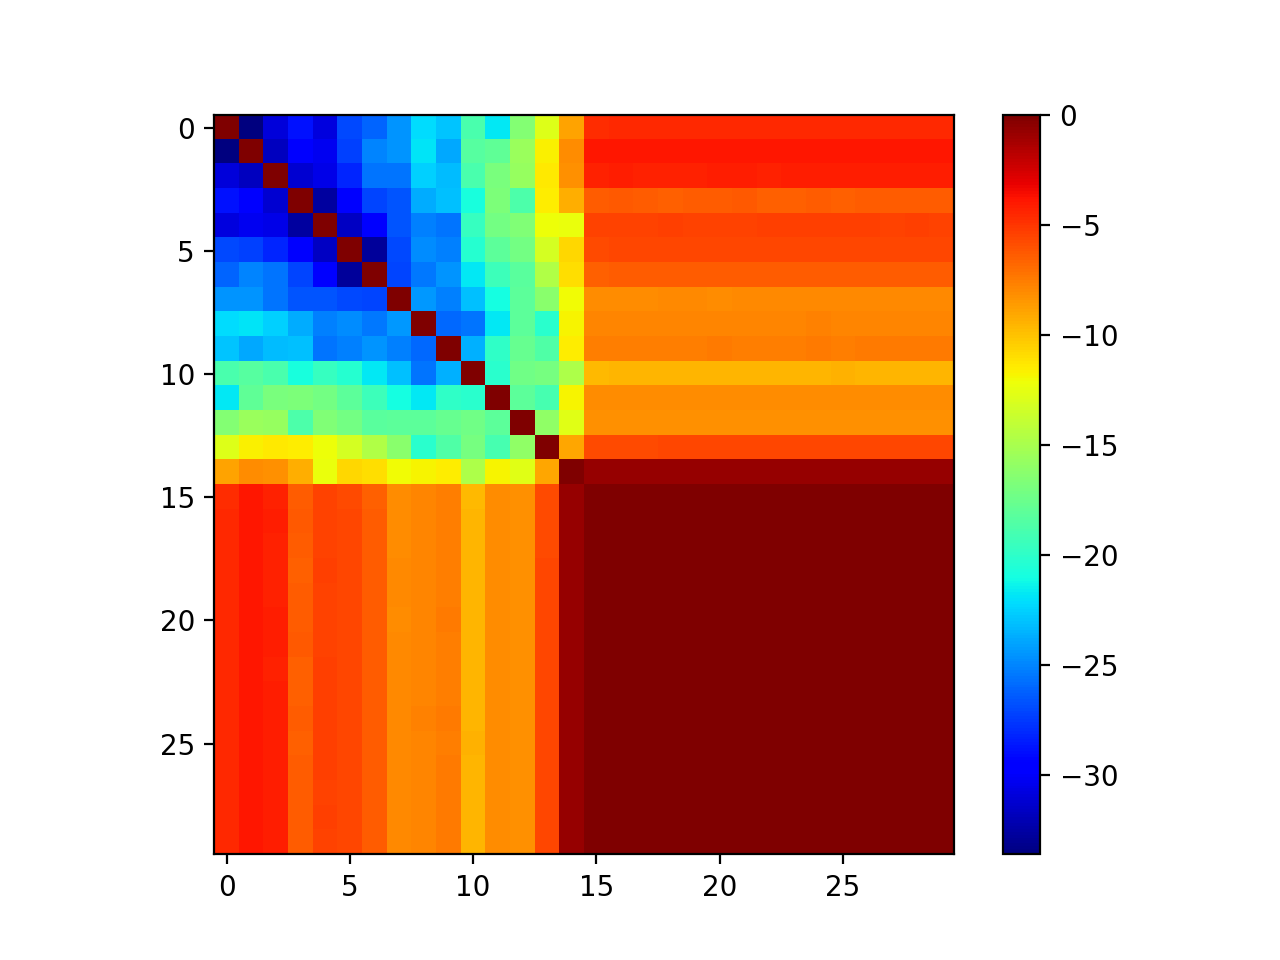

In [15]:
figure()
imshow(log(abs(cov)))
colorbar()